1
2
4
7
13
23
40
71
114
173
257
363
490
663
887
1164
1455
1819
2252
2722
3280
3926
4622
5426
6309
7337
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


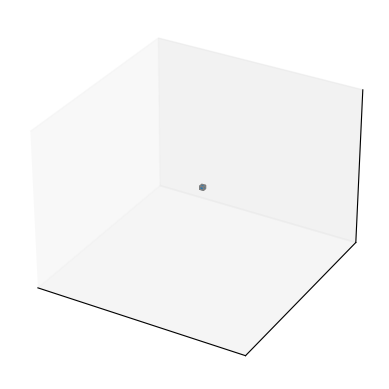

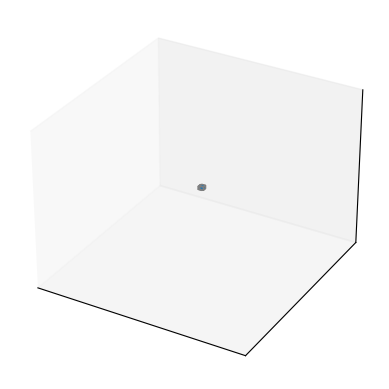

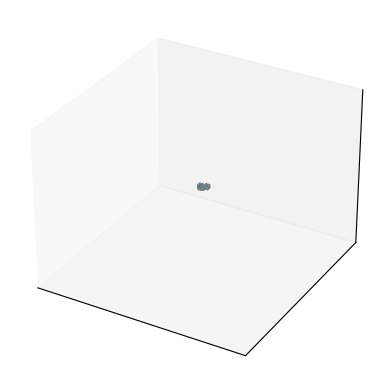

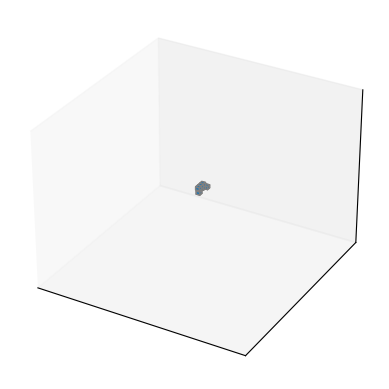

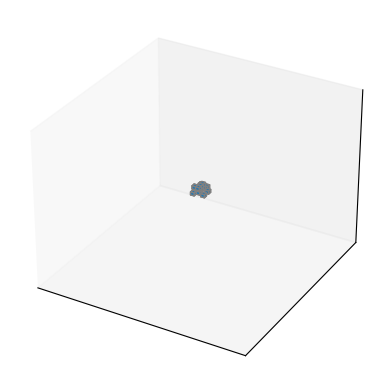

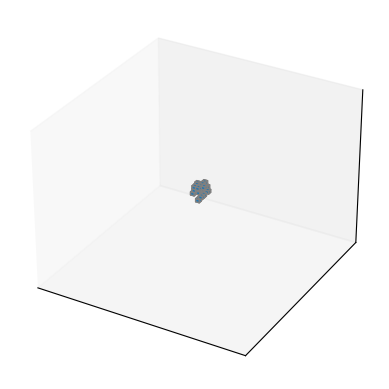

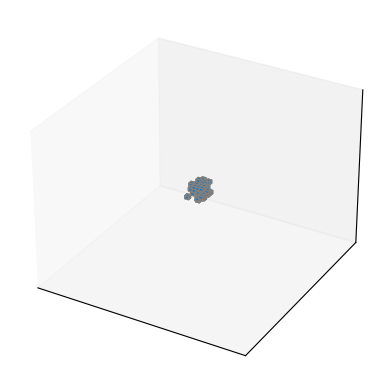

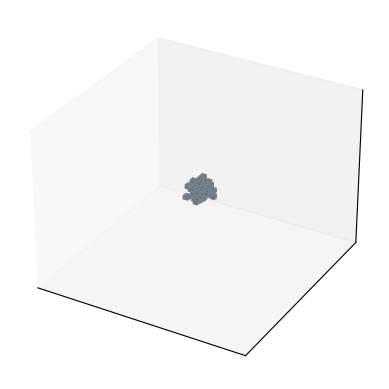

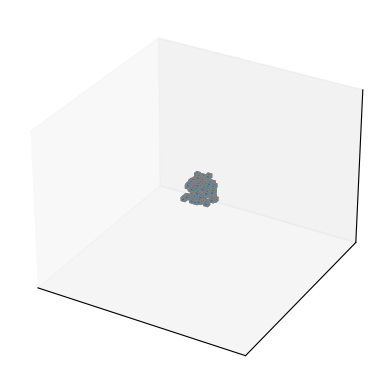

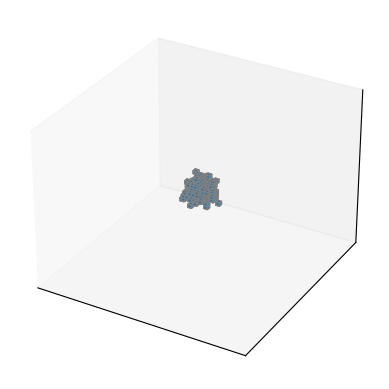

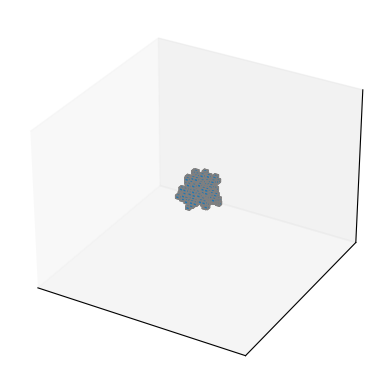

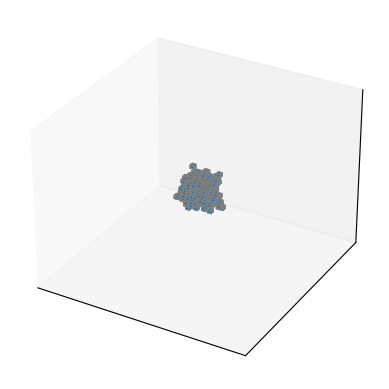

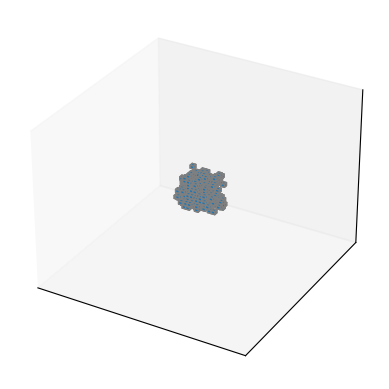

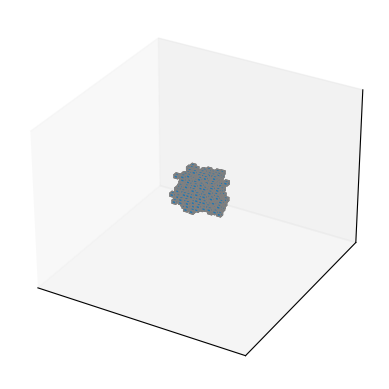

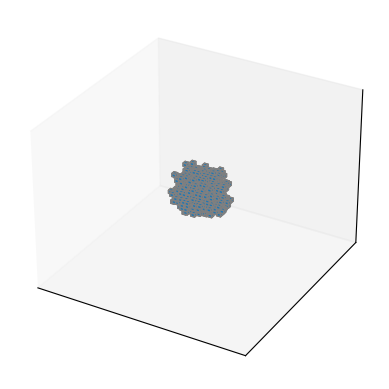

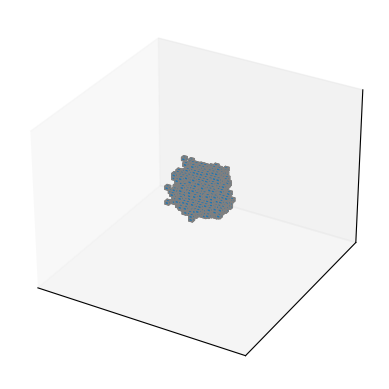

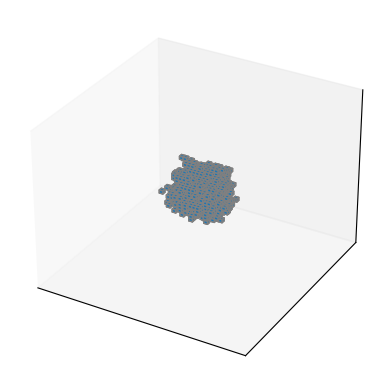

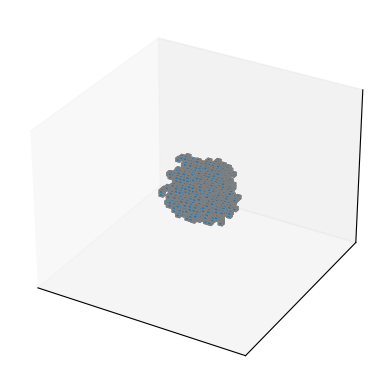

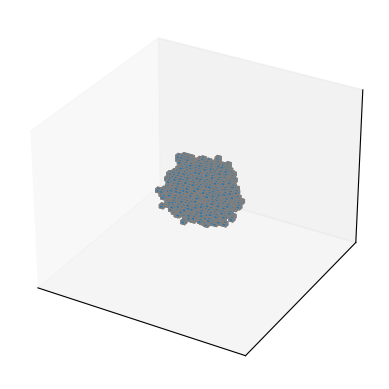

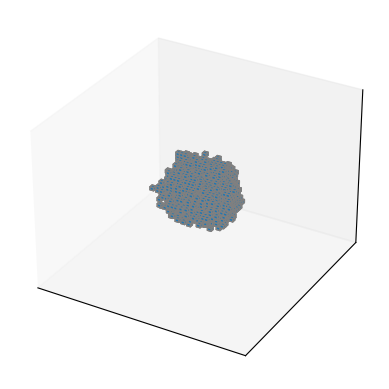

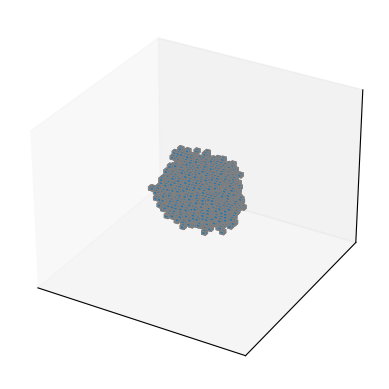

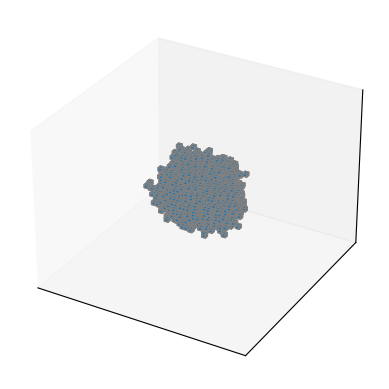

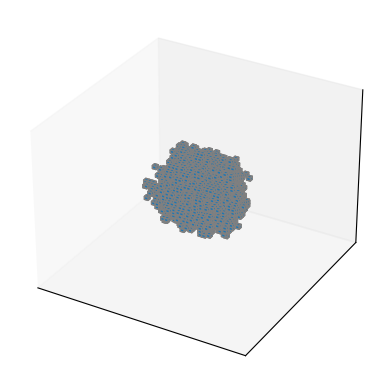

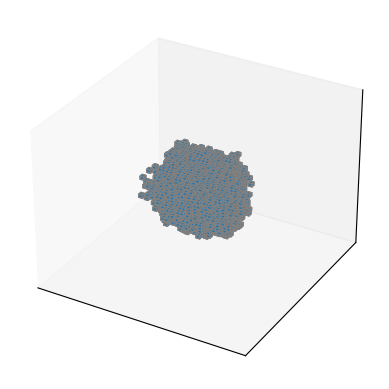

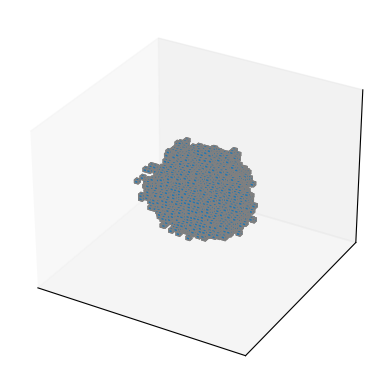

In [1]:
import cellpylib as cpl
import cellpylib3d as cpl3d
from collections import defaultdict
import numpy as np
from random import choice 
from cellular.cellular import update_cellular
import torch
# initial
init = False
step =25
size = (50,50,50)
kernal_size = (3,3,3)

current_state = torch.zeros((size[0], size[1], size[2]), dtype=torch.int32).cuda()
current_state[25, 25, 25] = 1
all_states = []
for i in range( step+1):    
    current_state = update_cellular(current_state, (kernal_size[0], kernal_size[1], kernal_size[2])).clamp(max=1)
    temp = current_state.cpu().numpy().copy()
    print(temp.sum())
    all_states.append(temp)
    
all_states = np.array(all_states)
print(all_states.sum(axis=1).sum(axis=2))

for i in range(step):
    cpl3d.plot3d(all_states, timestep=i)
